In [1]:
import calibrimbore as cal 

import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Warning, 26 of 6260 bins contained negative fluxes; they have been set to zero.
Warning, 82 of 6560 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 6560 bins contained negative fluxes; they have been set to zero.
Warning, 150 of 6876 bins contained negative fluxes; they have been set to zero.
Warning, 91 of 6558 bins contained negative fluxes; they have been set to zero.
Warning, 94 of 6875 bins contained negative fluxes; they have been set to zero.
Warning, 27 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 30 of 1426 bins contained negative fluxes; they have been set to zero.
Warning, 27 of 1933 bins contained negative fluxes; they have been set to zero.
Warning, 10 of 6254 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 6257 bins contained negative fluxes; they have been set to zero.
Warning, 22 of 6990 bins contained negative fluxes; they have been set to zero.
Warning, 3 of 4861 bins contained negativ

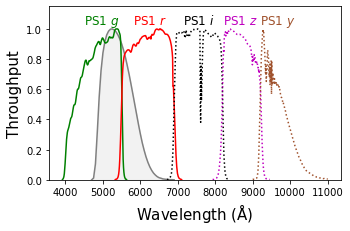

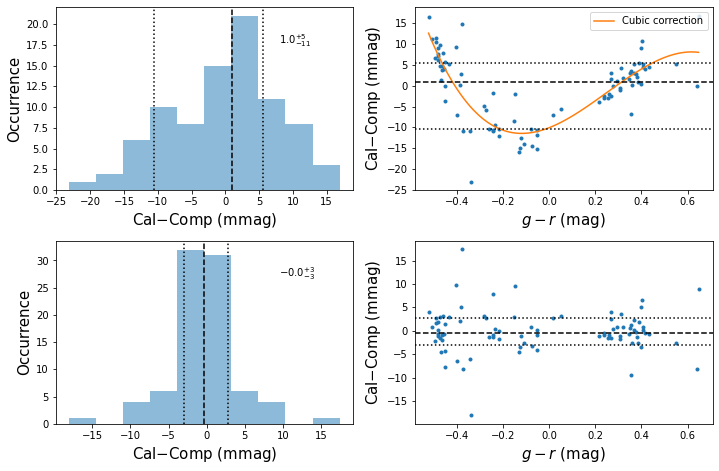

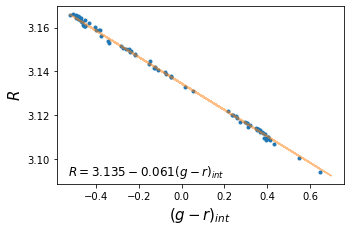

In [2]:
filt = '/Users/rridden/Documents/work/code/source_synphot/source_synphot/passbands/Kepler/Kepler_k.dat'
filt = '/Users/rridden/Documents/work/code/source_synphot/source_synphot/passbands/TESS/tess.dat'
filt = '/Users/rridden/Documents/work/code/source_synphot/source_synphot/passbands/keplercam/SNLS3_4shooter2_V.dat'
ring = cal.sauron(band=filt,plot=True,system='ab',gr_lims=[-1,.8],cubic_corr=True)

In [3]:
ring.fit_cubic_correction()

In [4]:
ring.print_cubic_correction()

<IPython.core.display.Math object>

In [6]:
x = ring.ps1_mags['g'] - ring.ps1_mags['r']
xx = np.arange(min(x[ring.mask]),max(x[ring.mask]),0.01)
ring.make_spline(smoothing=1)

In [7]:
from scipy.interpolate import CubicSpline
from scipy.optimize import minimize
from scipy.optimize import curve_fit

In [8]:
y = ring.diff[ring.mask]
X = x[ring.mask]
ind = np.argsort(X)

In [9]:
spl = CubicSpline(X[ind],y[ind])

In [10]:
def cubic(coeff,x):
    fit = coeff[0] + coeff[1] * x + coeff[2] * x**2 + coeff[3] * x**3
    return fit

def min_func(coeff,x,y):
    fit = cubic(coeff,x)
    chi = np.nansum((fit-y)**2)
    return abs(chi)

In [11]:
c0 = [10,10,10,10]
res = minimize(min_func,c0,args=(X,y))

In [12]:
res

      fun: 0.0009075554998217089
 hess_inv: array([[ 0.01639896, -0.010183  , -0.08369451,  0.06495123],
       [-0.010183  ,  0.17046898,  0.12528577, -0.5869    ],
       [-0.08369451,  0.12528577,  0.66240704, -0.63561701],
       [ 0.06495123, -0.5869    , -0.63561701,  2.72843678]])
      jac: array([ 4.44095349e-07, -2.52985046e-08,  6.33444870e-08, -7.42875272e-09])
  message: 'Optimization terminated successfully.'
     nfev: 80
      nit: 13
     njev: 16
   status: 0
  success: True
        x: array([-0.00149431,  0.00014668,  0.01184363,  0.00173621])

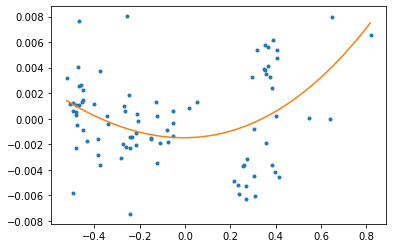

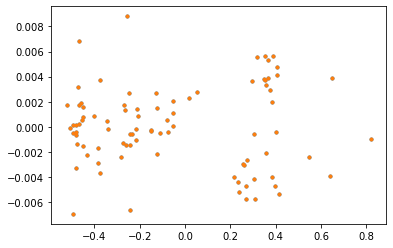

In [24]:
plt.figure()
plt.plot(x[ring.mask],ring.diff[ring.mask],'.')
plt.plot(xx,cubic(res.x,xx))


sub = ring.diff[ring.mask] - cubic(res.x,x[ring.mask])
plt.figure()
plt.plot(x[ring.mask],sub,'.')
m = ~cal.sigma_clip(sub,sigma=3).mask
plt.plot(x[ring.mask][m],sub[m],'.')

In [19]:
np.nanmedian(sub[m])

-0.00015122889501035825

In [20]:
np.nanstd(sub[m])

0.003211406339871656

In [21]:
np.nanstd(ring.diff[ring.mask][m])

0.0034759036155231474

Warning, 26 of 6260 bins contained negative fluxes; they have been set to zero.
Warning, 82 of 6560 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 6560 bins contained negative fluxes; they have been set to zero.
Warning, 150 of 6876 bins contained negative fluxes; they have been set to zero.
Warning, 91 of 6558 bins contained negative fluxes; they have been set to zero.
Warning, 94 of 6875 bins contained negative fluxes; they have been set to zero.
Warning, 27 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 30 of 1426 bins contained negative fluxes; they have been set to zero.
Warning, 27 of 1933 bins contained negative fluxes; they have been set to zero.
Warning, 10 of 6254 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 6257 bins contained negative fluxes; they have been set to zero.
Warning, 22 of 6990 bins contained negative fluxes; they have been set to zero.
Warning, 3 of 4861 bins contained negativ

<IPython.core.display.Javascript object>


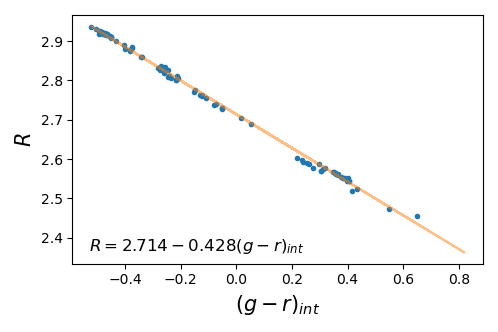

In [7]:
ring.calculate_R(plot=True)

In [ ]:
ring.

In [3]:
ring.fit_comp()

In [4]:
ring.coeff

array([ 0.        ,  0.23754716,  0.35333103,  0.27267768,  0.13748392,
       -0.00140542])

<IPython.core.display.Javascript object>


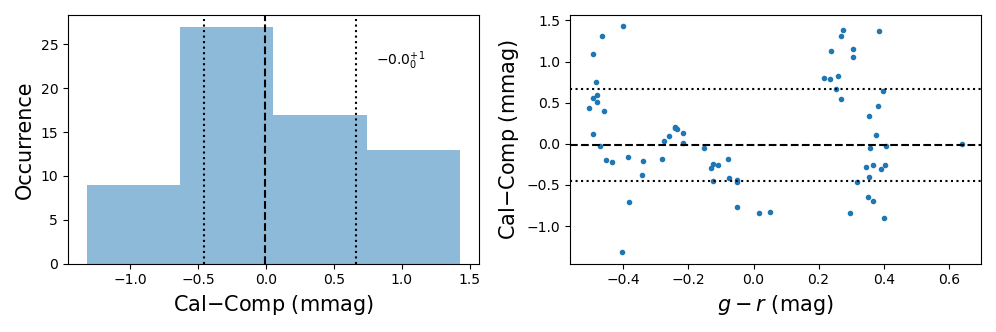

In [5]:
ring.diagnostic_plots()

In [6]:
ring.ps1_overlap

array([0.        , 0.1571635 , 0.27006522, 0.21300593, 0.06523388])

<IPython.core.display.Javascript object>


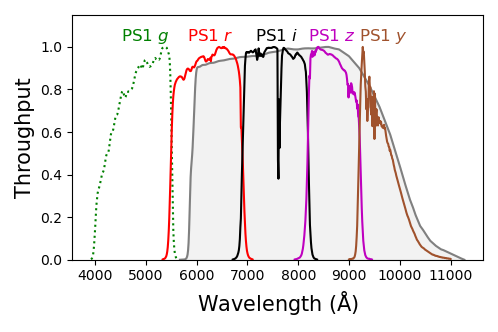